# $$Modelo:~ARIMA$$


### $$Conceito:$$


-----------------------------------------------------------------------------------------------------------------------



Os modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não Estacionaridade, no qual uma etapa inicial de diferenciação pode ser aplicada uma ou mais vezes para eliminar a não Estacionaridade





Modelos ARIMA não sazonais são geralmente designados **ARIMA(p, d, q)**, em que os parâmetros p, d e q são números inteiros não negativos, **p** é a ordem (número de intervalos de tempo) do modelo auto-regressivo, **d** é o grau de diferenciação (o número de vezes que os dados tiveram valores passados subtraídos) e **q** é a ordem do modelo de média móvel. 







O ARIMA espera dados que não sejam sazonais ou que o componente sazonal seja removido





Modelos ARIMA sazonais são geralmente designados ARIMA **(p, d, q) (P, D, Q) m**, em que **m** refere-se ao número de períodos em cada season e os maiúsculos **P, D, Q** referem-se ao autorregressivo, diferenciado, e termos da média móvel da parte sazonal do modelo ARIMA.









Quando dois dos três termos são zeros, o modelo pode ser referido com base no parâmetro diferente de zero, eliminando "AR", "I" ou "MA" da sigla que descreve o modelo. Por exemplo, ARIMA (1,0,0) é AR (1), ARIMA (0,1,0) é I (1) e ARIMA (0,0,1) é MA (1).



-----------------------------------------------------------------------------------------------------------------------





**Forecast:**



-----------------------------------------------------------------------------------------------------------------------



É a técnica de encontrar padrões e tendencias para tentar prever eventos futuros com base no histórico de dados no tempo





É parecido com análise supervisionada, porém busca a extrapolação na previsão dos dados, enquanto a análise supervisionada faz a previsão somente da interpolação


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Criar~modelos~utilizando~o ~algoritmo~ARIMA$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [2]:
#Pacotes
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

#Bibliotecas para deixar o grafico maior

import matplotlib as m
# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Carregar os dados


In [3]:
#Instalando e importando a API no código
import yfinance as yf 

# escolhendo uma carteira fictícia para exemplificarmos conceitos
codigo = ['PETR4.SA']

# carregando dados do valor 
petr4 = yf.Ticker(codigo[0])

petr4 = petr4.history(start='2020-01-01', end='2022-04-26') 
petr4 = petr4.iloc[:,0:5]
petr4

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,20.339558,20.466223,20.206228,20.466223,37774500
2020-01-03,20.586216,20.826211,20.299557,20.299557,71595600
2020-01-06,20.286224,20.626216,19.966231,20.539551,81844000
2020-01-07,20.546217,20.586216,20.312888,20.459553,32822000
2020-01-08,20.459554,20.512886,20.159560,20.332890,48215600
...,...,...,...,...,...
2022-04-18,27.961805,28.168198,27.342625,27.566965,76350600
2022-04-19,27.961805,28.715589,27.925911,28.401512,88494100
2022-04-20,28.401512,28.670721,28.114356,28.536116,34694700


**Dados do valor da ação da petrobras, 572 linhas e 5 variáveis**

In [4]:
# Serie Temporal com os dados de maior alta do dia
petr4 = pd.DataFrame(petr4['High'])
petr4

,High
Date,
2020-01-02,20.466223
2020-01-03,20.826211
2020-01-06,20.626216
2020-01-07,20.586216
2020-01-08,20.512886
...,...
2022-04-18,28.168198
2022-04-19,28.715589
2022-04-20,28.670721


**Vamos trabalhar com a variável High, que indica o valor maximo de cada dia de operação**

# Analise Exploratoria

In [5]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


**Os dados já estão no formato de série temporal**

In [6]:
# Shape
petr4.shape

(572, 1)

**São 572 observações**

In [7]:
# Transformar o indice em coluna, para extrair as datas
petr4 = petr4.reset_index()
petr4

,Date,High
0,2020-01-02,20.466223
1,2020-01-03,20.826211
2,2020-01-06,20.626216
3,2020-01-07,20.586216
4,2020-01-08,20.512886
...,...,...
567,2022-04-18,28.168198
568,2022-04-19,28.715589
569,2022-04-20,28.670721
570,2022-04-22,28.087435


**Transformamos o índice ('Date') em coluna para conseguir analisar as datas em períodos diferentes**

In [8]:
# Vamos extrair os detalhes da coluna Date: ano, mês, dia 
petr4['ano'] = petr4.Date.dt.year
petr4['mes'] = petr4.Date.dt.month
petr4['dia'] = petr4.Date.dt.day
petr4 = petr4.set_index('Date')
petr4

,High,ano,mes,dia
Date,,,,
2020-01-02,20.466223,2020,1,2
2020-01-03,20.826211,2020,1,3
2020-01-06,20.626216,2020,1,6
2020-01-07,20.586216,2020,1,7
2020-01-08,20.512886,2020,1,8
...,...,...,...,...
2022-04-18,28.168198,2022,4,18
2022-04-19,28.715589,2022,4,19
2022-04-20,28.670721,2022,4,20


**Criando as variáveis: ano, mes e dia conseguimos extrair a granularidade máxima e tira insights dos dados**

In [9]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
 1   ano     572 non-null    int64  
 2   mes     572 non-null    int64  
 3   dia     572 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.3 KB


**Dados no formato numérico**

In [10]:
# A variável High é nossa variável target 
target = petr4['High']

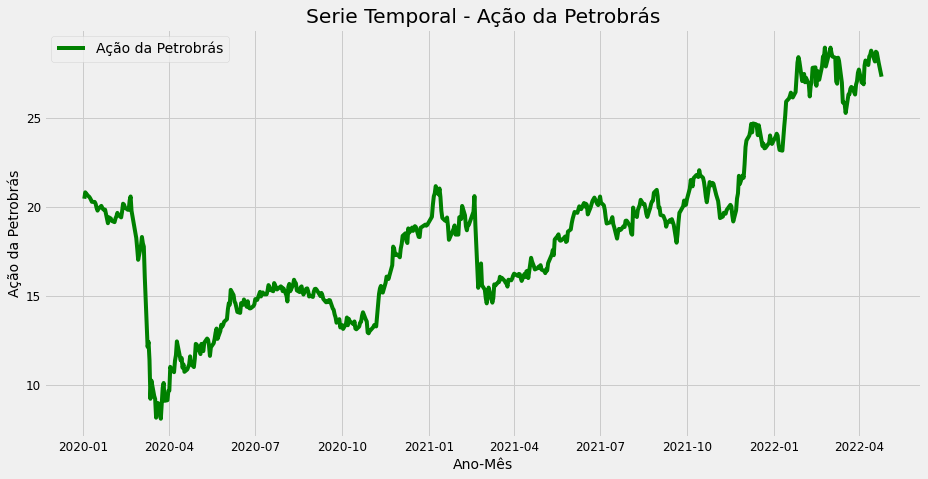

In [11]:
# Plot da Série Temporal
plt.figure(figsize=(14, 7))
plt.title("Serie Temporal - Ação da Petrobrás")
plt.plot(target, label = "Ação da Petrobrás", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Ação da Petrobrás")
plt.legend(loc = "best");

**Série aparenta ter sazonalidade e tendência**

##  Decomposição da Série Temporal

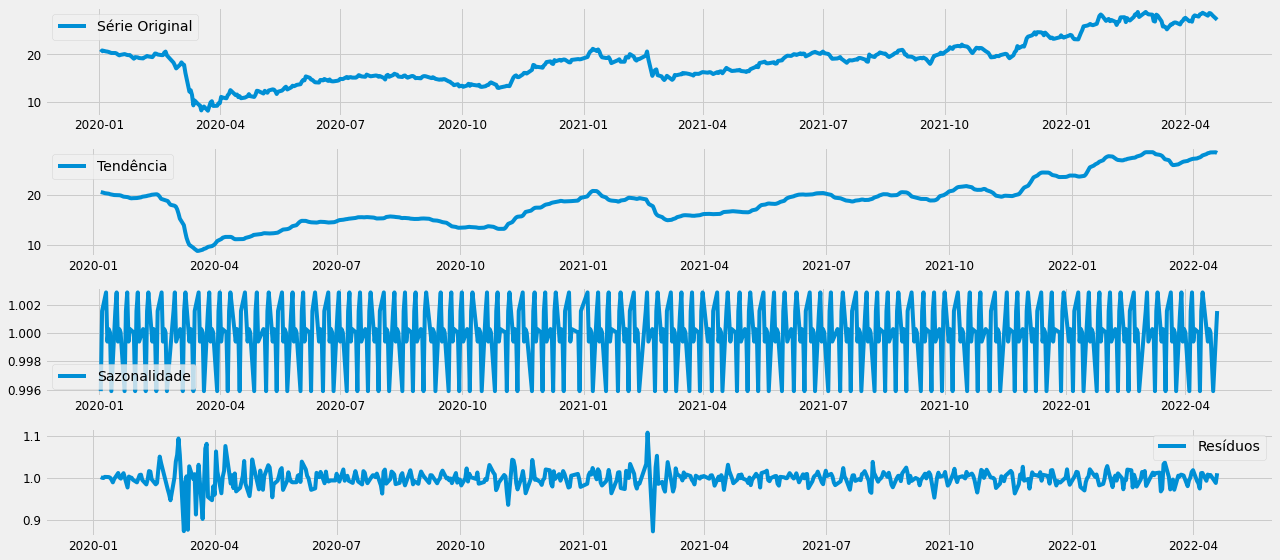

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Converter a data para datetime
target.index = pd.to_datetime(target.index, format="%m-%d-%Y")

#Transformar os dados em datafreme
a = pd.DataFrame(target)
decomposition = seasonal_decompose(a, model='multiplicative', period=6)

# Extraindo cada componente da série
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plot
plt.subplot(411)
plt.plot(a['High'], label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

**Note que há sazonalidade nos dados**

<AxesSubplot:xlabel='ano'>

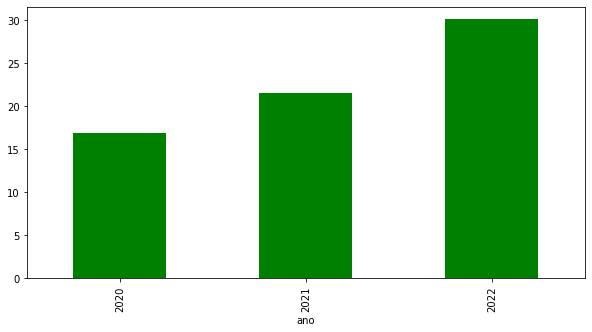

In [11]:
# Vamos criar um gráfico de barras com grafico por ano. 
plt.figure(figsize=(10, 5))
petr4.groupby('ano')['High'].mean().plot.bar(color = 'green')

**Tendência clara de alta**

<AxesSubplot:xlabel='mes'>

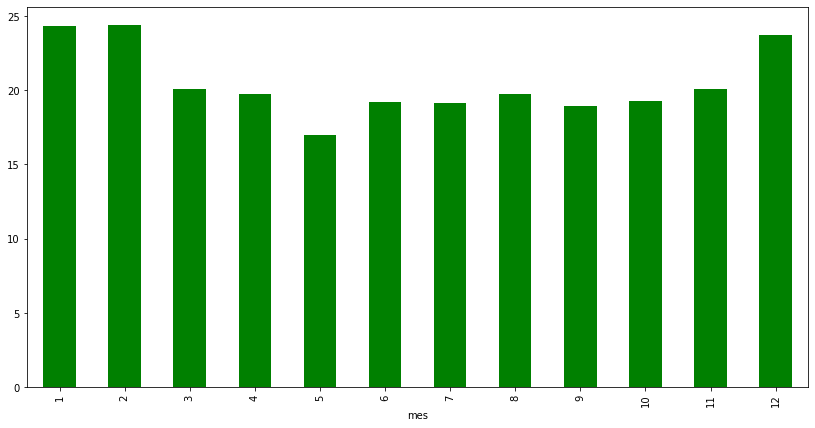

In [12]:
# Vamos criar um gráfico de barras por mês. 
plt.figure(figsize=(14, 7))
petr4.groupby('mes')['High'].mean().plot.bar(color = 'green')

**Os meses de dezembro a fevereiro tem o maior índice de alta**

<AxesSubplot:xlabel='dia'>

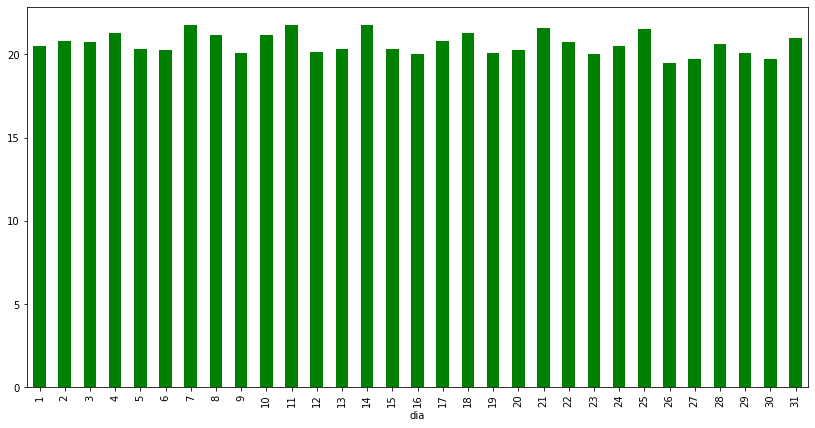

In [13]:
# A média diária por dia do mês
plt.figure(figsize=(14, 7))
petr4.groupby('dia')['High'].mean().plot.bar(color = 'green')

**Os dias do mês não parece ser relevante**

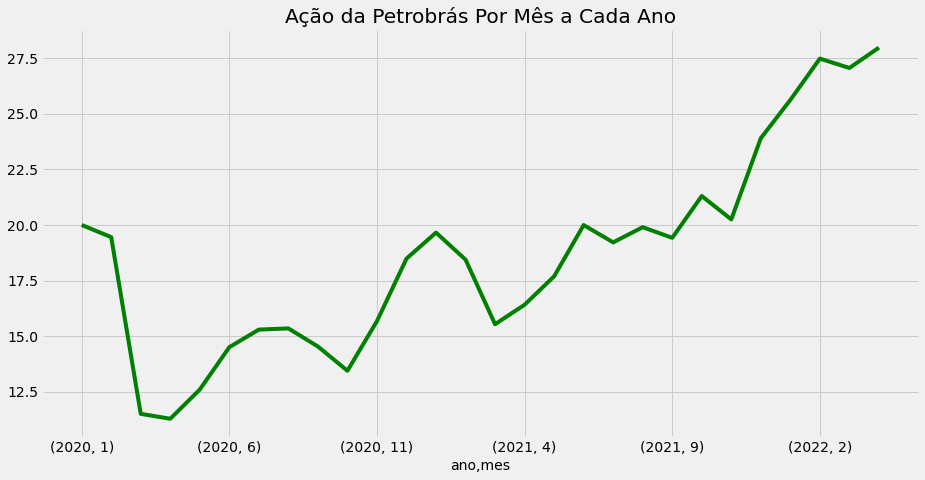

In [13]:
# Calcular a média mensal por ano
plt.figure(figsize=(14, 7))
media_mensal = petr4.groupby(['ano','mes'])['High'].mean()
media_mensal.plot(title = "Ação da Petrobrás Por Mês a Cada Ano", fontsize = 14, color = 'green');

**Tendência de alta com o passar dos meses**

### Modelo Aditivo (sazonalidade constante) X Modelo Multiplicativo (sazonalidade crescente)

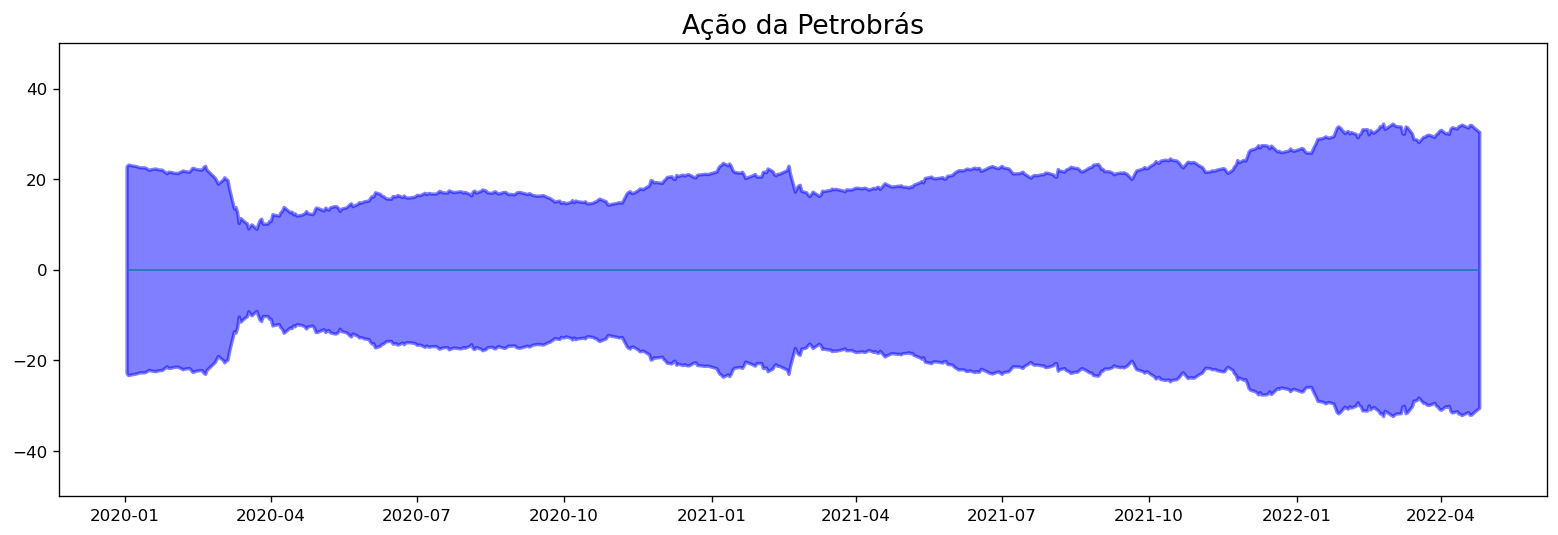

In [15]:
#Grafico de linha para verificar a variação nos dados em relação ao tempo

# Prepara os dados
x = petr4.index.values
y1 = petr4['High'].values


# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')


# Limites do eixo y
plt.ylim(-50, 50)


# Título
plt.title('Ação da Petrobrás', fontsize = 16)


# Limite das linhas
plt.hlines(y = 0, xmin = np.min(petr4.index), xmax = np.max(petr4.index), linewidth = 1);


# Mostra o gráfico
plt.show()

**A Série Temporal não tem uma clareza nos dados para saber se a sazonalidade é aditiva ou multiplicativa, o correto é testar as 2 formas**

## Verificar a estacionaridade da série

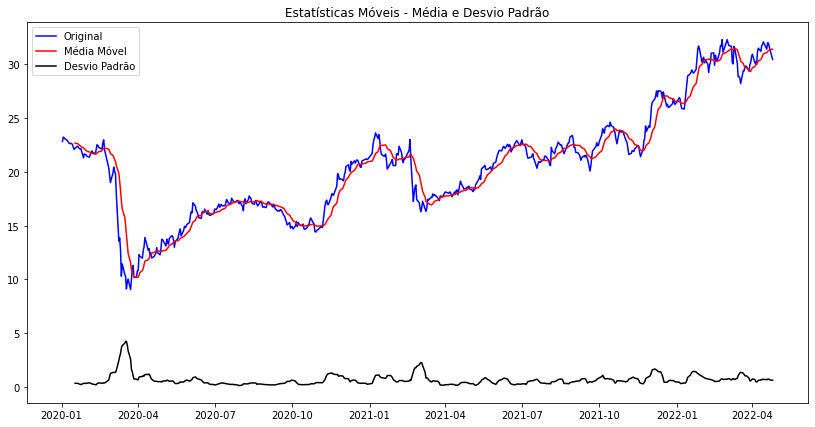


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.225023
Valor-p                           0.662740
Número de Lags Consideradas       7.000000
Número de Observações Usadas    564.000000
Valor Crítico (1%)               -3.441998
Valor Crítico (5%)               -2.866678
Valor Crítico (10%)              -2.569506
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [16]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    plt.figure(figsize=(14, 7))
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')
        

testa_estacionaridade(petr4.High)

## Pré-Processamento

#- **IMPORTANTE:** Para Modelos ARIMA, devemos remover a tendência, por isso sempre aplicamos diferenciação para as séries não estacionariam e transformamos os dados em Log natural para reduzir o efeito dos ruídos e deixar os dados com distribuição normal ou próximo dela

## 1° - Transformação de Log


- Séries temporais com uma distribuição exponencial podem ser linearizadas usando o logaritmo dos valores


- É importante observar que esta operação assume que os valores são positivos e diferentes de zero

In [17]:
# Aplicando transformação de log
df_log = np.log(petr4.High) 
df_log

Date
2020-01-02    3.127957
2020-01-03    3.145393
2020-01-06    3.135744
2020-01-07    3.133803
2020-01-08    3.130234
                ...   
2022-04-18    3.446489
2022-04-19    3.465736
2022-04-20    3.464172
2022-04-22    3.443618
2022-04-25    3.415758
Name: High, Length: 572, dtype: float64

**Aplicando transformação de log para deixar os dados perto de uma distribuição normal e mais lineares**

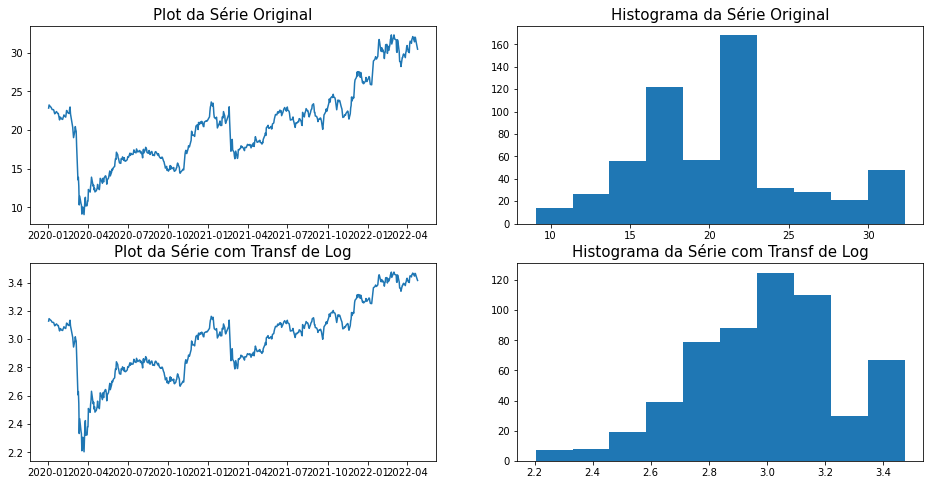

In [18]:
# Plot
fig, axes = plt.subplots(2, 2,figsize=(16,8))
axes[0,0].plot(petr4.High); axes[0, 0].set_title('Plot da Série Original',fontsize=15)
axes[0,1].hist(petr4.High); axes[0, 1].set_title('Histograma da Série Original',fontsize=15) 

axes[1,0].plot(df_log); axes[1, 0].set_title('Plot da Série com Transf de Log',fontsize=15) 
axes[1,1].hist(df_log); axes[1, 1].set_title('Histograma da Série com Transf de Log',fontsize=15) 

plt.show()

In [19]:
### Normalidade da Série

#P_value > 0.05 = dados normalizados

from scipy import stats
shapiro_test_orig = stats.shapiro(petr4.High)[1]
shapiro_test_log = stats.shapiro(df_log)[1]

print(f'Teste Shapiro dados Originais:  {round(shapiro_test_orig,5)}')
print(f'Teste Shapiro dados com log: {round(shapiro_test_log,5)}')

Teste Shapiro dados Originais:  0.0
Teste Shapiro dados com log: 0.0


**Observamos que após aplicar o log na série, o valor dos dados ficam em uma escala menor, porém a distribuição continua não sendo normal**

# Diferenciação(Lag)


- O processo de diferenciação pode ser repetido mais de uma vez até que toda a tendência seja removida.


- 1° diferenciação normalmente elimina a tendência da série e a 2° diferenciação elimina a sazonalidade

In [20]:
# Diferenciação de 1° Ordem
df_log_diff1 = df_log - df_log.shift(1)
df_log_diff1.dropna(inplace = True)
df_log_diff1

Date
2020-01-03    0.017437
2020-01-06   -0.009650
2020-01-07   -0.001941
2020-01-08   -0.003568
2020-01-09   -0.004887
                ...   
2022-04-18   -0.021432
2022-04-19    0.019247
2022-04-20   -0.001564
2022-04-22   -0.020554
2022-04-25   -0.027861
Name: High, Length: 571, dtype: float64

In [21]:
# Diferenciação de 2° Ordem
df_log_diff2 = df_log - df_log.shift(2)
df_log_diff2.dropna(inplace = True)
df_log_diff2

Date
2020-01-06    0.007787
2020-01-07   -0.011591
2020-01-08   -0.005510
2020-01-09   -0.008455
2020-01-10   -0.010783
                ...   
2022-04-18   -0.014176
2022-04-19   -0.002185
2022-04-20    0.017683
2022-04-22   -0.022118
2022-04-25   -0.048415
Name: High, Length: 570, dtype: float64

**Aplicamos diferenciação nos dados com transformação de Log para tornar a série estacionária e deixar a distribuição próxima ou normalizada**

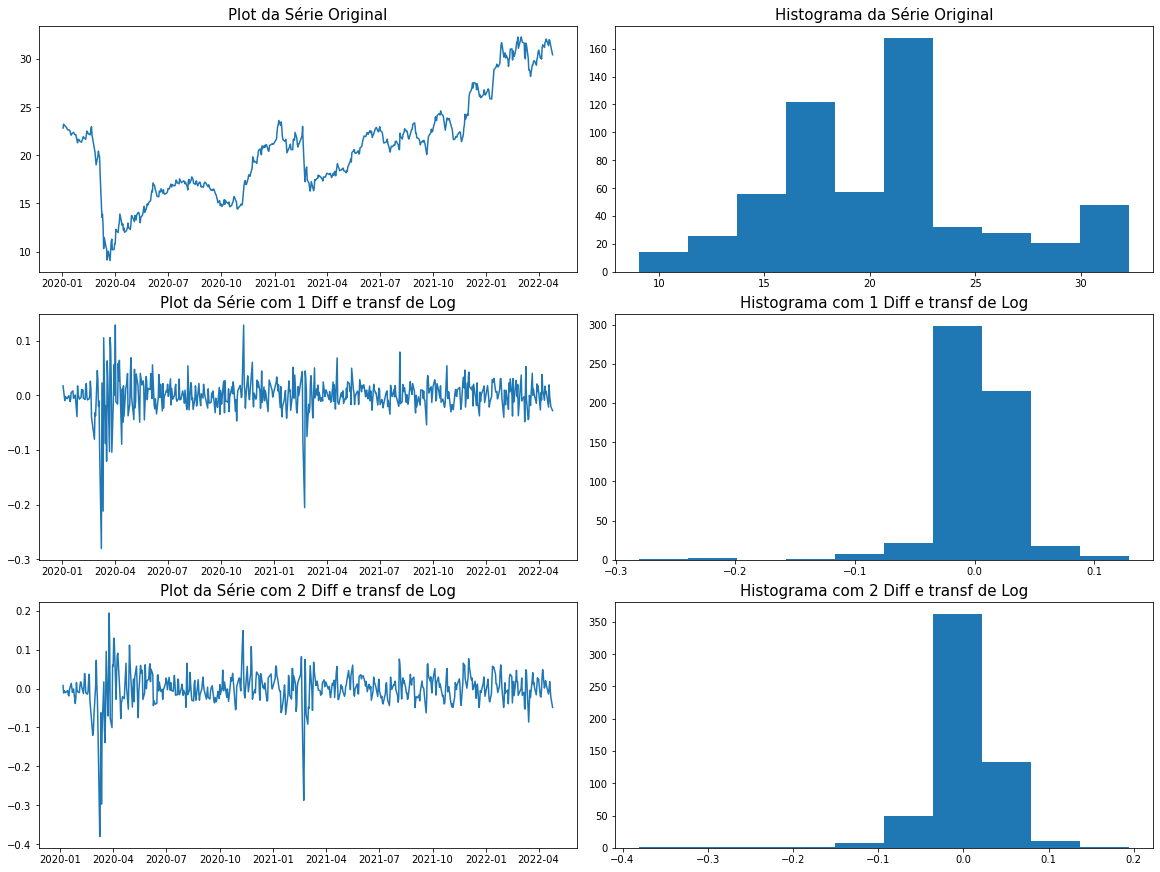

In [22]:
# Grafico de Plot e histograma da série original e com diferenciações
fig, axes = plt.subplots(3, 2,figsize=(16,12),constrained_layout=True)
axes[0,0].plot(petr4.High); axes[0, 0].set_title('Plot da Série Original',fontsize=15)
axes[0,1].hist(petr4.High); axes[0, 1].set_title('Histograma da Série Original',fontsize=15)
axes[1,0].plot(df_log_diff1); axes[1, 0].set_title('Plot da Série com 1 Diff e transf de Log',fontsize=15)
axes[1,1].hist(df_log_diff1); axes[1, 1].set_title('Histograma com 1 Diff e transf de Log',fontsize=15)
axes[2,0].plot(df_log_diff2); axes[2, 0].set_title('Plot da Série com 2 Diff e transf de Log',fontsize=15)
axes[2,1].hist(df_log_diff2); axes[2, 1].set_title('Histograma com 2 Diff e transf de Log',fontsize=15)
plt.show()

**Note que a série original não tem uma distribuição normal e os dados não são estacionários, porém ao aplicar 1 e 2 diffs graficamente os dados aparentam ficar com distribuição normal e com Estacionaridade**

In [23]:
### Teste de normalidade da Série

#P_value > 0.05 = dados normalizados

from scipy import stats
shapiro_test_orig = stats.shapiro(petr4.High)[1]
shapiro_test_log1 = stats.shapiro(df_log_diff1)[1]
shapiro_test_log2 = stats.shapiro(df_log_diff2)[1]

print(f'Teste Shapiro dados Originais:  {round(shapiro_test_orig,5)}')
print(f'Teste Shapiro dados com log e 1 Diff: {round(shapiro_test_log1,5)}')
print(f'Teste Shapiro dados com log e 2 Diff: {round(shapiro_test_log2,5)}')

Teste Shapiro dados Originais:  0.0
Teste Shapiro dados com log e 1 Diff: 0.0
Teste Shapiro dados com log e 2 Diff: 0.0


**Tanto a série original quanto as séries com diferenciações não apresentam estatisticamente distribuição normal dos dados, apesar de graficamente os dados se mostrarem bem próximos a uma distribuição normal**

- ### Aplicar a função para checar a estacionaridade 

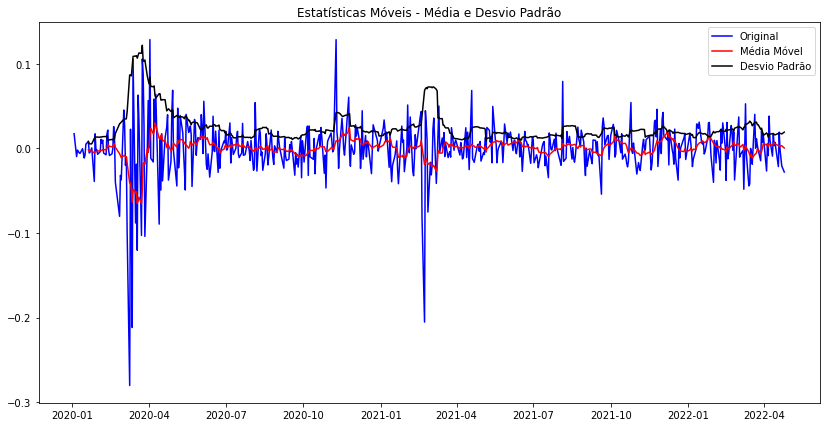


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -6.716698e+00
Valor-p                         3.567066e-09
Número de Lags Consideradas     6.000000e+00
Número de Observações Usadas    5.640000e+02
Valor Crítico (1%)             -3.441998e+00
Valor Crítico (5%)             -2.866678e+00
Valor Crítico (10%)            -2.569506e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [24]:
#função para checar a estacionaridade 1 diff
teste_log_diff1 = df_log_diff1.dropna() #Excluir os dados NAN gerado pelo diff
testa_estacionaridade(teste_log_diff1)

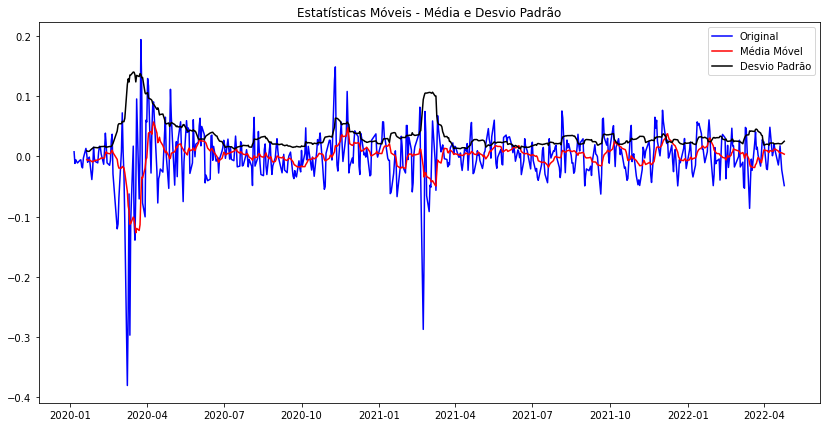


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -6.295354e+00
Valor-p                         3.516865e-08
Número de Lags Consideradas     1.300000e+01
Número de Observações Usadas    5.560000e+02
Valor Crítico (1%)             -3.442166e+00
Valor Crítico (5%)             -2.866752e+00
Valor Crítico (10%)            -2.569546e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [25]:
#função para checar a estacionaridade 2 diff
teste_log_diff2 = df_log_diff2.dropna() #Excluir os dados NAN gerado pelo diff
testa_estacionaridade(teste_log_diff2)

**Série Temporal estacionária com 1 ou 2 diffs**

**OBS: Após realizar as etapas de transformação de Log e diferenciação, chegou a hora de descobrir os melhores coeficientes do modelo ARIMA (p,d,q)**

 # Parâmetros ARIMA:

**Um modelo ARIMA requer 3 parâmetros:**

- param p: (int) Ordem do modelo de AR.
- param d: (int) Número de vezes que os dados precisam ser diferenciados.
- param q: (int) Ordem do modelo MA.

 ## 1° Determinando o Valor do Parâmetro d (I) para o Modelo ARIMA

- ### Diferenciação:

- O objetivo da diferenciação é tornar a série temporal estacionária. 


- A ordem correta de diferenciação é a diferenciação mínima necessária para obter uma série quase estacionária que circula em torno de uma média definida e o gráfico ACF chega a zero rapidamente.


- Se as autocorrelações forem positivas para muitos atrasos (10 ou mais), a série precisará ser diferenciada. Por outro lado, se a autocorrelação lag 1 em si for muito negativa, a série provavelmente será super diferenciada.



- Se não for possível realmente decidir entre duas ordens de diferenciação, então escolha a ordem que apresenta o menor desvio padrão na série diferenciada.

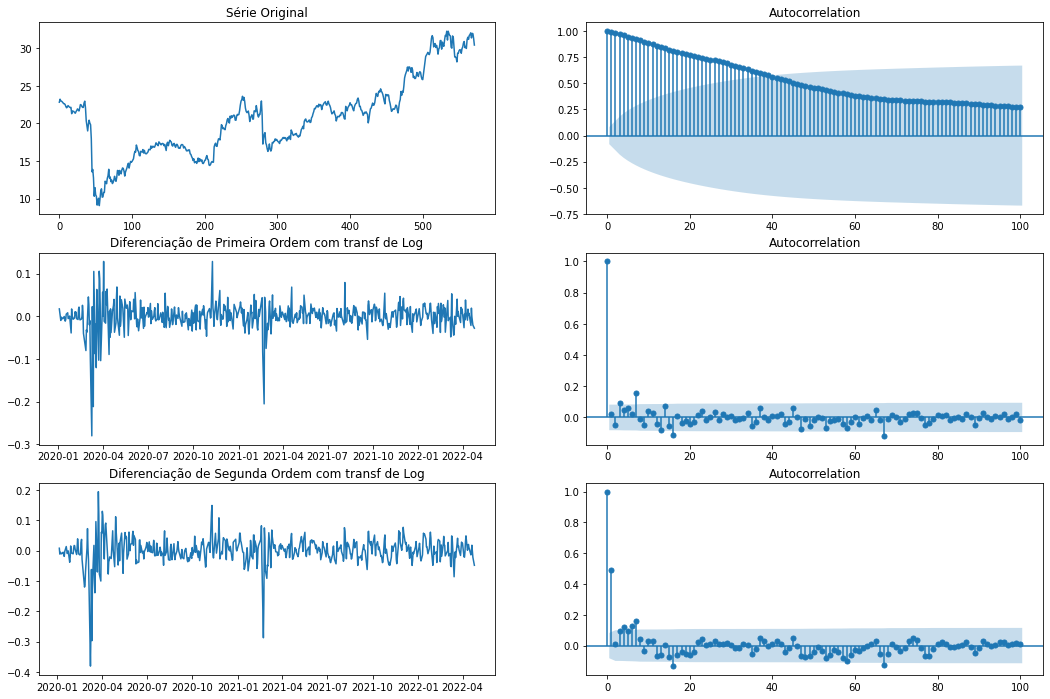

In [26]:
#Plot X autocorrelação da série original e com transformação de Log e diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Área de Plotagem
fig, axes = plt.subplots(3, 2,figsize=(18,12))

# Série Original
axes[0, 0].plot(target.values); axes[0, 0].set_title('Série Original')
plot_acf(target.values, lags = 100, ax = axes[0, 1])


# Diferenciação de Primeira Ordem e transformação de Log
axes[1, 0].plot(df_log_diff1); axes[1, 0].set_title('Diferenciação de Primeira Ordem com transf de Log')
plot_acf(df_log_diff1, lags = 100, ax = axes[1, 1])


# Diferenciação de Segunda Ordem e transformação de Log
axes[2, 0].plot(df_log_diff2); axes[2, 0].set_title('Diferenciação de Segunda Ordem com transf de Log')
plot_acf(df_log_diff2, lags = 100, ax = axes[2, 1])


plt.show()

**Veja que a série original tem um decaimento lento das lags na autocorrelação, indicando uma alta correlação com os primeiros 40 lags, já com os dados com a Transformação logarítmica e com diff de 1° e 2° ordem as correlações se aplicam somente no início das séries, portanto teremos que testar os melhores parâmetros de diferenciação com os valores 1 e 2**

In [27]:
# Teste KPSS, indica quantos diferenciação é necessaria para tornar os dados estacionarios
from pmdarima.arima.utils import ndiffs

ndiffs(target, test = 'kpss')  

1

**O teste KPSS é uma ajuda para indicar o menor número de diferenciação necessária para tornar a série estacionaria, porém, para modelagem é necessário outros parâmetros que em combinação com a diferenciação pode dar um valor diferente do teste**

**Conclusão parâmetro (I): Verificando a série original comparada com a série com log e diferenciada concluímos que o parâmetro I pode ser diferenciado 1 ou 2 vez para deixar a série estacionaria. Agora vamos encontrar o termo AR, com o parâmetro p**

 ## 2° Determinando o Valor do Parâmetro AR(p) para o Modelo ARIMA

- ### Auto Regressivo:

- Usar o gráficos PAC para descobrir o número necessário de termos AR




- A autocorrelação parcial pode ser imaginada como a correlação entre a série e seu atraso, após excluir as contribuições dos atrasos intermediários. Portanto, o PACF meio que transmite a correlação pura entre um atraso e a série. Dessa forma, você saberá se esse atraso é necessário no termo AR ou não





- Qualquer autocorrelação em uma série estacionarizada pode ser retificada adicionando termos AR suficientes. Portanto, inicialmente consideramos a ordem do termo AR igual a tantas defasagens que ultrapassam o limite de significância no gráfico PACF.

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


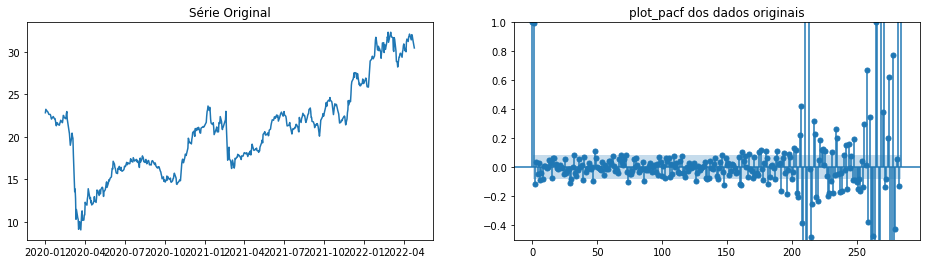

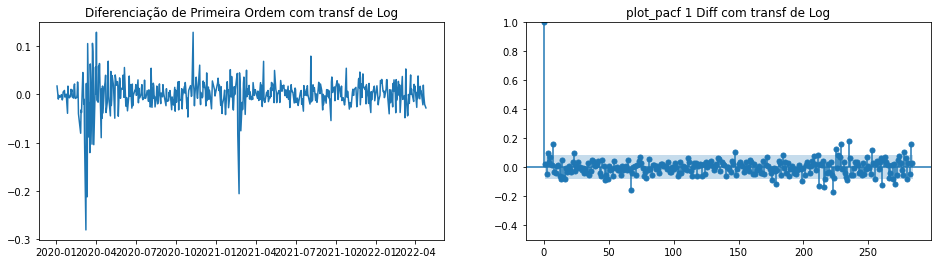

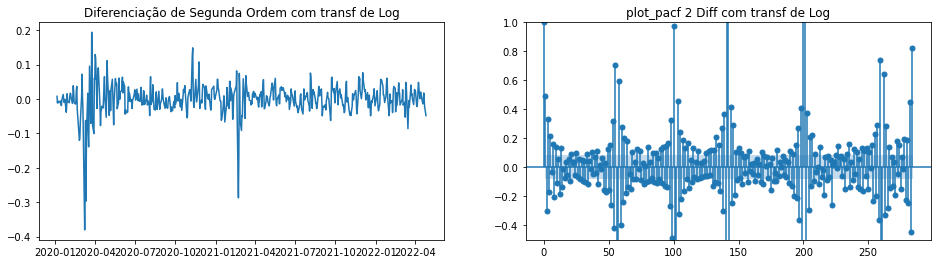

In [28]:
# Gráfico de plot X Autocorrelação parcial da série original e com transformação de Log e diff

from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(target); axes[0].set_title('Série Original')
axes[1].set(ylim = (-0.5,1))
plot_pacf(target.values, lags = 284, ax = axes[1]);axes[1].set_title('plot_pacf dos dados originais')



fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(df_log_diff1); axes[0].set_title('Diferenciação de Primeira Ordem com transf de Log')
axes[1].set(ylim = (-0.5,1))
plot_pacf(df_log_diff1, lags = 284, ax = axes[1]);axes[1].set_title('plot_pacf 1 Diff com transf de Log')




fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(df_log_diff2); axes[0].set_title('Diferenciação de Segunda Ordem com transf de Log')
axes[1].set(ylim = (-0.5,1))
plot_pacf(df_log_diff2, lags = 284, ax = axes[1]);axes[1].set_title('plot_pacf 2 Diff com transf de Log')

plt.show()

**No gráfico original percebemos uma forte autocorrelação nos últimos Lags, já na diferenciação de Primeira Ordem com transformação de Log há poucos dados com autocorrelação forte durante a série, porém no gráfico com diferenciação de Segunda Ordem com transformação de Log praticamente toda a série tem autocorrelação, mostrando um ciclo com forte autocorrelação a cada 50 lags**

**Conclusão parâmetro (p): Verificando a série original comparada com a série diferenciada e transformada com Log natural, fica difícil encontrar um número ideal do termo (AR), portanto para ter o melhor ajuste é necessário testar alguns valores**

## 3° Determinando o Valor do Parâmetro q para o Modelo ARIMA

- ### Média Movel:

- Usa as médias moveis para descobrir a melhor previsão com base nos resíduos




-  Observar o gráfico ACF para o número de termos MA. Um termo MA é tecnicamente o erro da previsão atrasada





- O ACF informa quantos termos MA são necessários para remover qualquer autocorrelação na série estacionarizada





- Os modelos MA (q) tentam capturar os efeitos de choque observados em termos de ruído branco. Estes efeitos de choque podem ser considerados eventos inesperados que afetam o processo de observação, p, como ganhos repentinos, guerras, ataques, etc.


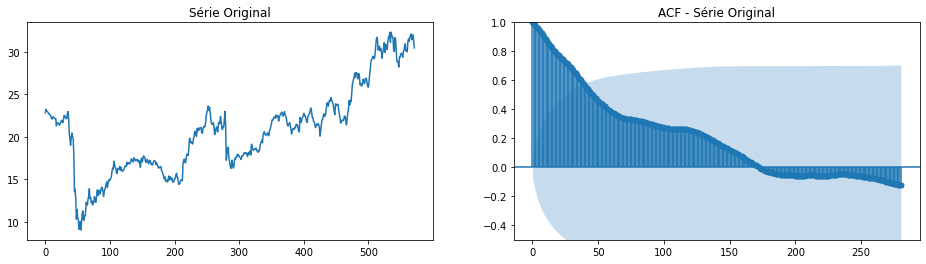

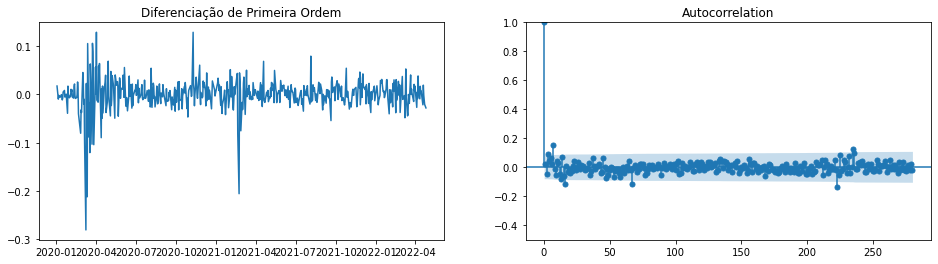

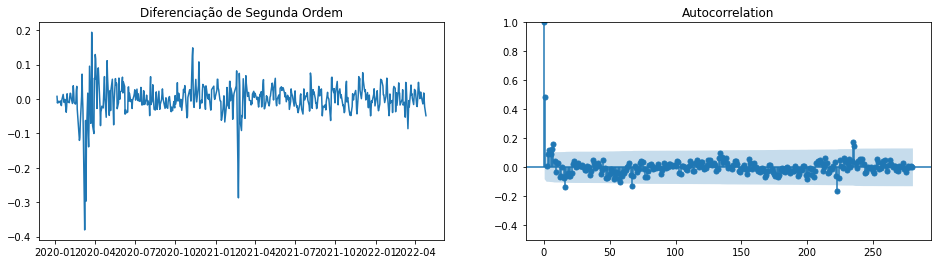

In [29]:
# Gráfico ACF

fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(target.values); axes[0].set_title('Série Original')
axes[1].set(ylim = (-0.5,1))
plot_acf(target.values, lags = 280, ax = axes[1]);axes[1].set_title('ACF - Série Original')



fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(df_log_diff1); axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (-0.5,1))
plot_acf(df_log_diff1, ax = axes[1],lags = 280)



fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(df_log_diff2); axes[0].set_title('Diferenciação de Segunda Ordem')
axes[1].set(ylim = (-0.5,1))
plot_acf(df_log_diff2, ax = axes[1],lags = 280)

plt.show()

**Observando os dados originais e os dados diferenciados e com transformação de Log, podemos concluir que em todos os casos a uma autocorrelação nos primeiros lags, sendo essa autocorrelação mais forte nos dados originais**

**Embora a autocorrelação se mostre forte nos dados originais, fica difícil definir um valor do termo (q) para o modelo ARIMA, sendo necessário testar alguns valores para conseguir encontrar o melhor modelo**

# Modelagem:

## 1° Dividir os dados em treino teste e validação

In [30]:
#Dividir os dados em treino e teste
df_treino = petr4.High.iloc[0:500]
df_teste = petr4.High.iloc[500:]

#Transformar os dados em Log Natural
df_treino_log = np.log(df_treino)
df_teste_log = np.log(df_teste)

#Aplicar diferenciação de 1° e 2° ordem nos dados de treino com log natural
df_treino_log_diff1 = df_treino_log - df_treino_log.shift(1)
df_treino_log_diff2 = df_treino_log - df_treino_log.shift(1)

#Aplicar diferenciação de 1° e 2° ordem nos dados de teste com log natural
df_teste_log_diff1 = df_teste_log - df_teste_log.shift(1)
df_teste_log_diff2 = df_teste_log - df_teste_log.shift(1)

In [31]:
#Dividir os dados de treino em validação também para treinar e validar a performance do modelo
df_treino_val = df_treino[0:420]
df_valid = df_treino[420:500]

#Transformar os dados de treino e validação em Log Natural
df_treino_val_log = np.log(df_treino_val)
df_valid_log = np.log(df_valid)

#Aplicar diferenciação de 1° e 2° ordem nos dados de treino de validação com Log Natural
df_treino_val_log_diff1 = df_treino_val_log - df_treino_val_log.shift(1)
df_treino_val_log_diff2 = df_treino_val_log - df_treino_val_log.shift(2)

#Aplicar diferenciação de 1° e 2° ordem nos dados de validação com Log Natural
df_valid_log_diff1 = df_valid_log - df_valid_log.shift(1)
df_valid_log_diff2 = df_valid_log - df_valid_log.shift(2)

**No modelo ARIMA usamos os dados originais da série ou com transformação Logarítmica, pois determinamos os parâmetros dentro do algorítimo, portanto para comparar o modelo gerado com os dados originais, diferenciamos a série conforme o número de diferenciações que serão usadas na modelagem**

**Observe que a separação dos registros em uma série temporal é feita com ordem cronológica**

# Cria o 1° Modelo ARIMA:

In [32]:
# 1° Modelo diff = 1
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# Modelo 1
# Usamos a serie sem diferenciação pois determinamos os parametros dentro do algoritimo do ARIMA
modelo_ARIMA1 = ARIMA(df_treino_val_log, order = (1, 1, 1))

# Treinamento
modelo_v1 = modelo_ARIMA1.fit( disp = False)

In [33]:
# Sumário do Modelo 
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                  419
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 817.729
Method:                       css-mle   S.D. of innovations              0.034
Date:                Tue, 03 May 2022   AIC                          -1627.459
Time:                        14:17:13   BIC                          -1611.307
Sample:                             1   HQIC                         -1621.074
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.002     -0.095      0.924      -0.004       0.003
ar.L1.D.High    -0.7900      0.113     -6.997      0.000      -1.011      -0.569
ma.L1.D.High     0.8525      0.095      9.018      0.000       0.667       1.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2658           +0.0000j            1.2658            0.5000
MA.1           -1.1730           +0.0000j            1.1730            0.5000
-----------------------------------------------------------------------------
"""

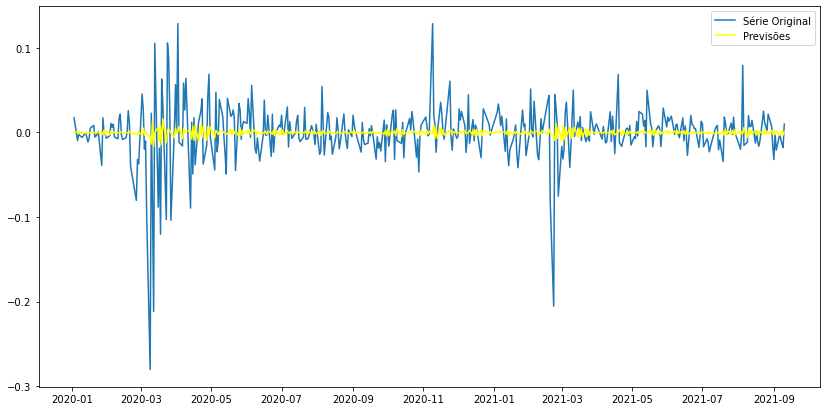

In [34]:
#Dados reais x previsão
dados_reais = df_treino_val_log_diff1
previsoes = modelo_v1.fittedvalues

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes, color = 'yellow', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

**O modelo não se ajustou bem aos dados de Treino**

## Forecast dados de validação

In [35]:
# Forecast - Definir o numero de periodos a frente para ser previsto 
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
fc, se, conf = modelo_v1.forecast(len(df_valid_log), alpha = 0.05) 

In [36]:
# Dados das Previsões
fc

array([3.05744743, 3.05773813, 3.0572123 , 3.05733153, 3.05694116,
       3.05695338, 3.05664755, 3.05659298, 3.05633991, 3.05624366,
       3.05602353, 3.05590125, 3.05570167, 3.05556317, 3.05537641,
       3.05522777, 3.05504902, 3.05489406, 3.0547203 , 3.05456139,
       3.05439075, 3.05422938, 3.05406069, 3.05389778, 3.0537303 ,
       3.05356643, 3.05339971, 3.05323525, 3.053069  , 3.05290416,
       3.05273821, 3.05257313, 3.05240737, 3.05224215, 3.05207649,
       3.05191118, 3.0517456 , 3.05158023, 3.0514147 , 3.0512493 ,
       3.05108379, 3.05091836, 3.05075287, 3.05058743, 3.05042195,
       3.05025651, 3.05009103, 3.04992558, 3.04976011, 3.04959466,
       3.04942919, 3.04926373, 3.04909827, 3.04893281, 3.04876735,
       3.04860189, 3.04843642, 3.04827096, 3.0481055 , 3.04794004,
       3.04777458, 3.04760912, 3.04744366, 3.04727819, 3.04711273,
       3.04694727, 3.04678181, 3.04661635, 3.04645089, 3.04628542,
       3.04611996, 3.0459545 , 3.04578904, 3.04562358, 3.04545

In [37]:
# Erros do modelo
se

array([0.03436885, 0.05014766, 0.06105107, 0.07095694, 0.07916457,
       0.08694044, 0.09382512, 0.10042311, 0.10647567, 0.11230546,
       0.11776941, 0.12304968, 0.12806784, 0.13293064, 0.13759578,
       0.14212769, 0.14650428, 0.15076555, 0.15490066, 0.15893513,
       0.16286437, 0.16670513, 0.17045619, 0.17412892, 0.17772387,
       0.18124901, 0.18470573, 0.18809983, 0.19143307, 0.1947098 ,
       0.19793187, 0.20110264, 0.20422395, 0.20729845, 0.21032786,
       0.21331438, 0.21625956, 0.21916524, 0.22203285, 0.22486393,
       0.22765977, 0.23042171, 0.23315093, 0.23584857, 0.2385157 ,
       0.24115334, 0.24376243, 0.24634389, 0.24889858, 0.25142732,
       0.25393087, 0.25640998, 0.25886535, 0.26129765, 0.26370752,
       0.26609556, 0.26846236, 0.27080847, 0.27313444, 0.27544076,
       0.27772793, 0.27999642, 0.28224668, 0.28447914, 0.28669421,
       0.2888923 , 0.29107379, 0.29323906, 0.29538845, 0.29752232,
       0.29964099, 0.30174478, 0.30383401, 0.30590897, 0.30796

In [38]:
# Coeficientes(intervalo de confiança de cada periodo de dados)
conf[0:10]

array([[2.99008572, 3.12480914],
       [2.95945054, 3.15602573],
       [2.93755441, 3.17687019],
       [2.91825848, 3.19640459],
       [2.90178146, 3.21210086],
       [2.88655325, 3.22735351],
       [2.8727537 , 3.24054141],
       [2.8597673 , 3.25341866],
       [2.84765145, 3.26502838],
       [2.836129  , 3.27635832]])

In [39]:
# Criar um dataframe com as datas junto com a previsão 
fc_series = pd.Series(fc, index = df_valid_log.index)

#criar os intervalos de confiança
limite_inferior = pd.Series(conf[:, 0], index = df_valid_log.index)
limite_superior = pd.Series(conf[:, 1], index = df_valid_log.index)


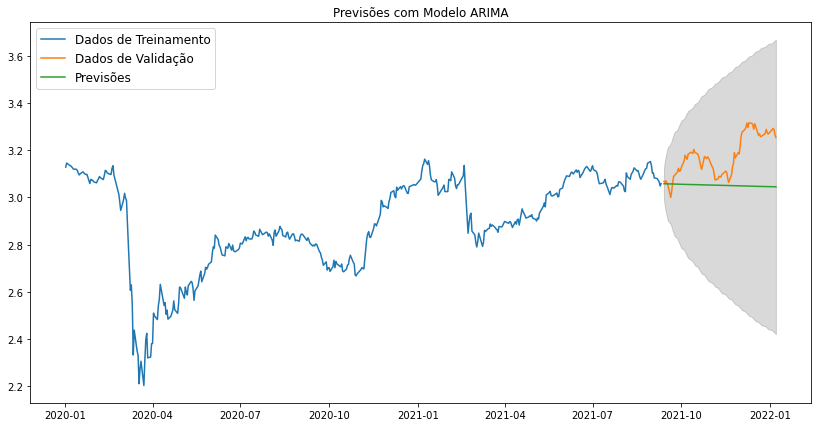

In [40]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_treino_val_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

**Observe que as previsões estão praticamente lineares ao longo do tempo, apesar do intervalo confiança a 95% está dentro dos limites de suporte e resistência dos dados**

### Calcular o erro usando AIC

In [41]:
#Erro do modelo
round(modelo_v1.aic,2)

-1627.46

### Calcular o erro usando RMSE

In [42]:
# Define valor real e valor previsto
y_true = df_valid_log
y_pred = fc_series

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
round(metrica_rmse,3)

0.152

**Modelo base para comparação com os próximos modelos**

# Cria o 2° Modelo ARIMA:

In [43]:
# 2° Modelo diff = 2
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# Modelo 2
# Usamos a serie sem diferenciação pois determinamos os parametros dentro do algoritimo do ARIMA
modelo_ARIMA2 = ARIMA(df_treino_val_log, order = (1, 2, 1))

# Treinamento
modelo_v2 = modelo_ARIMA2.fit( disp = False)

In [44]:
# Sumário do Modelo 
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.High   No. Observations:                  418
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 810.628
Method:                       css-mle   S.D. of innovations              0.035
Date:                Tue, 03 May 2022   AIC                          -1613.256
Time:                        14:17:13   BIC                          -1597.114
Sample:                             2   HQIC                         -1606.875
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.379e-05   1.42e-05      0.974      0.330    -1.4e-05    4.16e-05
ar.L1.D2.High     0.0153      0.049      0.313      0.755      -0.081       0.111
ma.L1.D2.High    -1.0000      0.008   -122.988      0.000      -1.016      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           65.3796           +0.0000j           65.3796            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

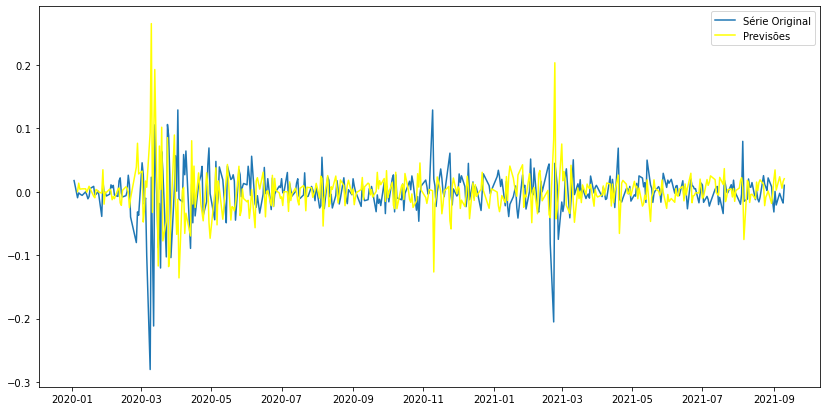

In [45]:
#Dados reais x previsão
dados_reais = df_treino_val_log_diff1
previsoes = modelo_v2.fittedvalues

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes, color = 'yellow', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

**O modelo se ajustou bem aos dados de Treino**

In [46]:
# Forecast - Definir o numero de periodos a frente para ser previsto 

fc, se, conf = modelo_v2.forecast(len(df_valid_log), alpha = 0.05) 

In [47]:
# Criar um dataframe para criar os intervalos de confiança
fc_series = pd.Series(fc, index = df_valid_log.index)
limite_inferior = pd.Series(conf[:, 0], index = df_valid_log.index)
limite_superior = pd.Series(conf[:, 1], index = df_valid_log.index)


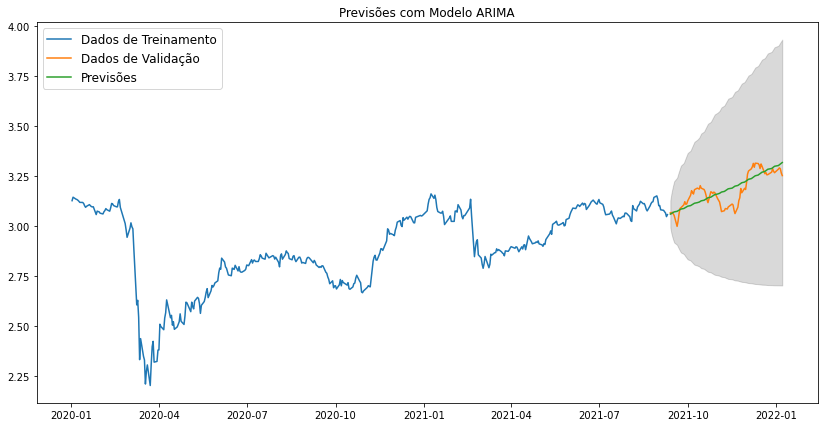

In [48]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_treino_val_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

**Agora a previsão está bem mais próxima dos dados reais em relação ao modelo 1**

### Calcular o erro usando AIC

In [49]:
#Erro do modelo
round(modelo_v2.aic,2)

-1613.26

### Calcular o erro usando RMSE

In [50]:
# Define valor real e valor previsto
y_true = df_valid_log
y_pred = fc_series

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
round(metrica_rmse,3)

0.054

**Com a mudança no parâmetro de diferenciação de 1 para 2, tivemos uma melhora significantes nas previsões, e para ter um ajuste ainda melhor, vamos encontrar os melhores parâmetros usando a combinação de valores diferentes para (p,d,q)**

# Cria o 3° Modelo ARIMA:

- ### Grid Search Para encontrar os melhores Parâmetros para (p, d e q)

In [51]:
p_values = [0,1,2,3,4,5]
q_values = [0,1,2,3]
d_values = [0,1,2]
s
dados_treino = df_treino_val_log
dados_teste = df_valid_log

melhor_RMSE = np.inf
for p in p_values:
    for d in d_values:
        for q in q_values:
    
            s = ARIMA(dados_treino, order = (p, d, q))
            modelo_v3 = modelo_ARIMA3.fit( disp = False)
            fc, _, _ = modelo_v3.forecast(len(dados_teste), alpha = 0.05) 
            fc_series = pd.Series(fc, index = dados_teste.index)


            y_true = dados_teste
            y_pred = fc_series

            # Calcula o erro usando RMSE (Root Mean Squared Error)
            metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
            print(f'ARIMA{p, d, q} RMSE= {metrica_rmse} ')
            if metrica_rmse < melhor_RMSE:
                melhor_RMSE = metrica_rmse
                melhor_order = (p, d, q)
                melhor_modelo = modelo_v3
# Print
print('\nMelhor Valor de AIC: %6.2f | order: %s'%(melhor_RMSE, melhor_order))
print('\nMelhor Modelo:', melhor_modelo.summary())

ARIMA(0, 0, 0) RMSE= 0.2963214804502695 
ARIMA(0, 0, 1) RMSE= 0.2955391276059814 
ARIMA(0, 0, 2) RMSE= 0.29447872475133424 
ARIMA(0, 0, 3) RMSE= 0.29388435040324773 
ARIMA(0, 1, 0) RMSE= 0.15201833687484667 
ARIMA(0, 1, 1) RMSE= 0.1518235011839816 
ARIMA(0, 1, 2) RMSE= 0.15141249794085732 
ARIMA(0, 1, 3) RMSE= 0.15367674077510055 
ARIMA(0, 2, 0) RMSE= 0.310628485151422 
ARIMA(0, 2, 1) RMSE= 0.05378044805646269 
ARIMA(0, 2, 2) RMSE= 0.05378069555112401 
ARIMA(0, 2, 3) RMSE= 0.05396933542035946 
ARIMA(1, 0, 0) RMSE= 0.1971809782885672 
ARIMA(1, 0, 1) RMSE= 0.19953586804816323 
ARIMA(1, 0, 2) RMSE= 0.195812648953544 
ARIMA(1, 0, 3) RMSE= 0.2048707316722427 
ARIMA(1, 1, 0) RMSE= 0.15184550287497717 
ARIMA(1, 1, 1) RMSE= 0.1522363910127393 
ARIMA(1, 1, 2) RMSE= 0.15258869065928965 
ARIMA(1, 1, 3) RMSE= 0.16855668147765313 
ARIMA(1, 2, 0) RMSE= 0.12537039193872096 
ARIMA(1, 2, 1) RMSE= 0.05376788793112554 
ARIMA(1, 2, 2) RMSE= 0.05321545918441237 
ARIMA(1, 2, 3) RMSE= 0.05385989054337904 
AR

In [66]:
# Melhor hiperparâmetro
melhor_order

(2, 2, 2)

**Melhores hiperparâmetros encontrado para o algorítimo ARIMA foi: (2,2,2)**

## Forecast dados de Teste

- Vamos usar os melhores parâmetros encontrado no Grid Search para fazer a previsão com os dados de treino e teste

In [53]:
#Separar os dados de treino e teste
petr4_treino = petr4.iloc[0:500,0]
petr4_teste = petr4.iloc[500:,0]

In [54]:
# Aplicadar as transformação de LOG nos dados reais
petr4_Log = np.log(petr4.iloc[:,0])

# Aplicadar as transformação de LOG nos dados de treino e teste
petr4_treino_log = np.log(petr4_treino)
petr4_teste_log = np.log(petr4_teste)


#Aplicar diferenciação de 2° ordem nos dados de validação com Log Natural
petr4_treino_log_diff2 = petr4_treino_log - petr4_treino_log.shift(2)


**Separamos os dados em treino e teste com transformação logarítmica para comparar com o modelo ARIMA**

In [55]:
#Modelo 4 - Melhores parâmetros
import warnings
warnings.filterwarnings('ignore')


# Modelo 
# Usamos a serie sem diferenciação pois determinamos os parametros dentro do algoritimo do ARIMA
modelo_AR4 = ARIMA(petr4_treino_log, order = (1, 2, 3))


# Treinamento
modelo_v4 = modelo_AR4.fit()  

In [56]:
# Forecast - Definir o numero de periodos a frente para ser previsto 

fc, se, conf = modelo_v4.forecast(len(petr4_teste), alpha = 0.05) 

In [57]:
# Criar um dataframe para criar os intervalos de confiança
fc_series = pd.Series(fc, index = petr4_teste.index)
limite_inferior = pd.Series(conf[:, 0], index = petr4_teste.index)
limite_superior = pd.Series(conf[:, 1], index = petr4_teste.index)

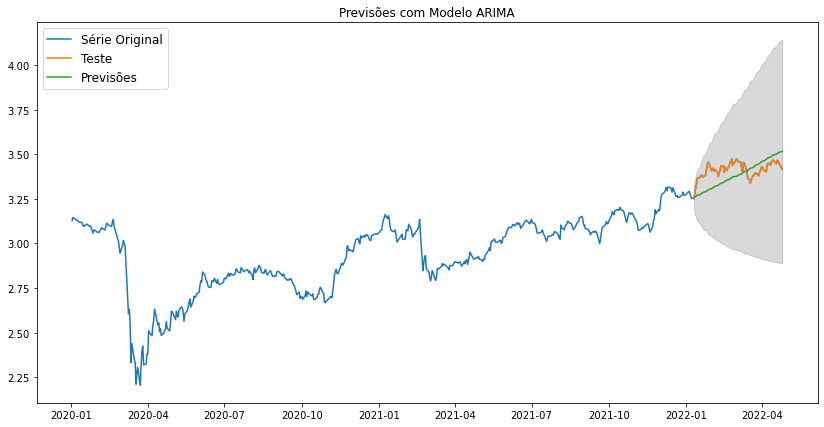

In [58]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(petr4_Log, label = 'Série Original')
plt.plot(petr4_teste_log, label = 'Teste')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

### Calcular o erro usando AIC

In [59]:
#Erro do modelo
round(modelo_v3.aic,2)

-1615.39

### Calcular o erro usando RMSE

In [60]:
# Define valor real e valor previsto
y_true = petr4_teste_log
y_pred = fc_series

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
round(metrica_rmse,3)

0.075

**Observe que os erros do modelo 2 chegou bem próximo do modelo 3**

# Analise dos resíduos

- Para um bom ajuste do modelo os resíduos não podem ter autocorrelação

In [67]:
# Função para anlise dos resíduos
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import scipy
import scipy.stats as scs
def tsplot(y, lags = None, figsize = (12, 8), style = 'bmh'):
    
    # Se a série não for do tipo pd.Series, fazemos a conversão
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # Criamos os plots
    with plt.style.context(style):    
        fig = plt.figure(figsize = figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax = ts_ax)
        ts_ax.set_title('Plots Para Análise dos Residuos')
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)
        sm.qqplot(y, line = 's', ax = qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)

        plt.tight_layout()
    return

Média dos Residuos: 0.0


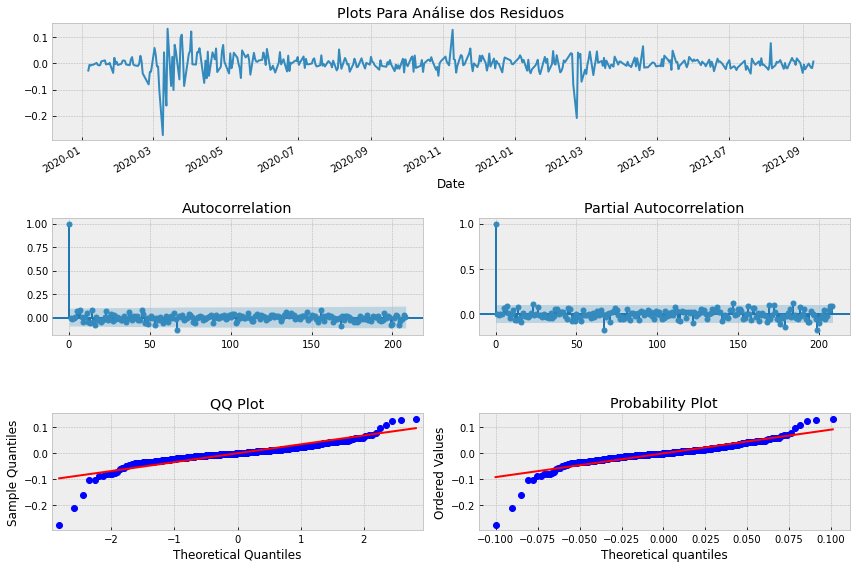

In [62]:
# Executa a função com dados de treino
tsplot(modelo_v3.resid, lags = 208)

print(f'Média dos Residuos: {round(modelo_v3.resid.mean(),3)}')

**Média dos resíduos é igual a zero, praticamente não há autocorrelação e a distribuição dos resíduos parece ser normal**

<AxesSubplot:>

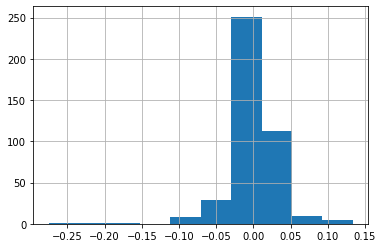

In [68]:
#Histograma dos resíduos
modelo_v3.resid.hist()

**Para um melhor ajuste os resíduos do modelo devem ser normalmente distribuídos, graficamente os dados aparentam ter distribuição normal, porém vamos checar com o teste jarque_bera**

In [64]:
# Teste jarque_bera
from statsmodels.stats.stattools import jarque_bera
score, pvalue, _, _ = jarque_bera(modelo_v3.resid)
print(f'P_value: {pvalue}')
# Resultado
if pvalue < 0.05:
    print ('\nOs resíduos podem não ser normalmente distribuídos.')
else:
    print ('\nOs resíduos parecem normalmente distribuídos.')

P_value: 0.0

Os resíduos podem não ser normalmente distribuídos.


**Apesar do histograma aparentar que os dados possuem distribuição normal, o teste jarque_bera nega essa hipótese**

In [65]:
# Teste de Ljung-Box
resultado_teste = sms.diagnostic.acorr_ljungbox(modelo_v3.resid, lags = [30], boxpierce = False)
print('Valor-p =', resultado_teste[1])

Valor-p = [0.77490365]


**Observe que o valor-p é maior que 0,05, o que indica que os valores são aleatórios e independentes ao longo do tempo em um nível de significância de 95% e, portanto, o modelo ARIMA (2,2,2) fornece um bom ajuste do modelo**

# Conclusão

**Uma série temporal pode ser analisada de várias formas, desde a escolha do período de tempo, até o modelo a ser usados, neste miniprojeto demos ênfase na análise exploratória e nos parâmetros do modelo ARIMA, tivemos várias dúvidas em relação à escolha dos melhores hiperparâmetros para o algorítimo ARIMA, porém com ajuda do grid Search conseguimos encontrar-los. O resultado final foi satisfatório quando olhamos para as métricas dos erros e para o teste Ljung-Box, poderíamos ter testados mais parâmetros e fazer uma análise exploratória mais completa, porém, para fins didáticos o objetivo foi alcançado**